In [5]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

HousePrice1 = pd.read_csv("HousePrice1.csv")

Current working directory: /Users/chereowang27/NYCDSA/Machine_Learning_I/Machine_Learning_Project/Ames_Housing_ML


In [6]:
HousePrice1.columns

Index(['Unnamed: 0', 'MapRefNo', 'Prop_Addr', 'Unnamed: 0.1', 'PID',
       'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'Garage

In [7]:
HousePrice1['ppsqft']= HousePrice1["SalePrice"]/HousePrice1['GrLivArea']
HousePrice1['mo_Yr_sold'] = HousePrice1.MoSold.astype(str) + '/' + HousePrice1.YrSold.astype(str)
HousePrice1['mo_Yr_sold'] = pd.to_datetime(HousePrice1['mo_Yr_sold'])
HousePrice1_gr = HousePrice1.groupby(['mo_Yr_sold','Neighborhood'])[['SalePrice']].median()\
         .reset_index()
HousePrice1_gr

,mo_Yr_sold,Neighborhood,SalePrice
0,2006-01-01,CollgCr,232500.0
1,2006-01-01,Gilbert,172400.0
2,2006-01-01,NAmes,138000.0
3,2006-01-01,NWAmes,181000.0
4,2006-01-01,SWISU,80000.0
...,...,...,...
891,2010-07-01,Crawfor,257500.0
892,2010-07-01,Edwards,80000.0
893,2010-07-01,IDOTRR,55000.0
894,2010-07-01,NAmes,161000.0


<Figure size 144000x7200 with 0 Axes>

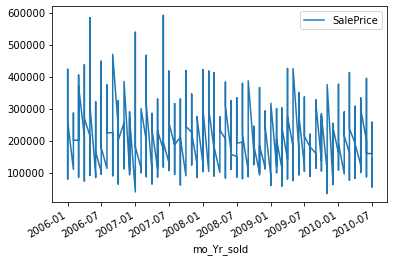

In [8]:
from matplotlib.pyplot import figure
figure(figsize=(2000, 100))
g = HousePrice1_gr.plot(x = "mo_Yr_sold", y = 'SalePrice')
plt.show()

In [9]:
#Feature selection
HousePrice2 = HousePrice1.drop(['Unnamed: 0', 'MapRefNo','PID','Unnamed: 0.1', 'Prop_Addr'], \
                               axis = 1)
num_features = HousePrice2._get_numeric_data()  \
 .drop(['MSSubClass', 'SalePrice'], axis = 1)
num_features['bath'] = num_features['FullBath'] + 0.5*num_features['HalfBath']

numCol = num_features.columns


In [10]:
col = HousePrice2.columns
catCol = [col for col in HousePrice2.columns if col not in num_features.columns]

In [11]:
cat_features = HousePrice1[catCol]
# group Neighborhood
p_mean_by_nb = HousePrice1.groupby('Neighborhood')['SalePrice'].mean() 
nb_bin = pd.qcut(p_mean_by_nb, q = [0,0.25,.5,.75,1],
                 labels = ['tier1','tier2','tier3','tier4'])\
                .to_dict()
                 #tier1 < tier2 < tier3 < tier4
cat_features['NbPriceTier'] = cat_features['Neighborhood'].map(nb_bin)                              

<ipython-input-11-9a576222a57b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_features['NbPriceTier'] = cat_features['Neighborhood'].map(nb_bin)


In [12]:
# Standardize numeric features
from sklearn.preprocessing import StandardScaler
num_features[numCol] = StandardScaler().fit_transform(num_features)
num_features

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,ppsqft,bath
0,-1.282448,-0.380010,-0.272250,-0.029114,0.341611,-1.055629,-1.644655,-0.561034,-0.479669,-0.305885,...,-0.696667,-0.361281,-0.098457,2.635565,-0.054329,-0.097199,-1.181094,1.643652,0.854467,-1.157191
1,-0.887563,-1.257168,-0.724720,-0.756695,-0.551205,0.461074,0.014825,0.285286,0.251865,1.956730,...,0.899488,-0.361281,-0.098457,-0.287826,-0.054329,-0.097199,-1.556163,0.882858,0.391556,0.412044
2,-0.887563,-1.257168,-0.724720,-0.756695,-0.551205,0.461074,0.014825,0.285286,0.251865,1.956730,...,0.899488,-0.361281,-0.098457,-0.287826,-0.054329,-0.097199,-1.556163,0.882858,0.391556,0.412044
3,-0.985773,-0.416611,-0.498795,-0.756695,3.020060,-1.358970,1.137414,-0.561034,0.682864,-0.305885,...,-0.696667,0.297195,3.330818,-0.287826,-0.054329,-0.097199,1.819454,-0.638731,0.124196,-1.157191
4,-0.908024,0.517341,-0.240559,-1.484276,2.127243,-2.370105,0.942181,-0.561034,-1.034143,-0.305885,...,-0.696667,2.272625,-0.098457,1.666972,-0.054329,-0.097199,-0.430957,0.882858,-0.366136,-1.157191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,-1.086029,-0.380010,-0.152912,-0.029114,0.341611,-1.830833,-1.644655,-0.561034,-1.034143,-0.305885,...,0.793078,-0.361281,-0.098457,0.416605,-0.054329,-0.097199,-0.430957,0.882858,0.199943,-1.157191
2620,0.511925,0.388193,0.444522,-2.211857,-0.551205,-0.516357,-1.400614,-0.561034,-1.034143,-0.305885,...,-0.696667,-0.361281,-0.098457,-0.287826,-0.054329,-0.097199,-0.055889,0.882858,-1.316127,0.412044
2621,1.062309,0.610736,-0.472798,-0.756695,0.341611,-0.718584,-1.644655,-0.561034,-0.372501,-0.305885,...,-0.696667,-0.361281,-0.098457,-0.287826,-0.054329,-0.097199,0.694248,-0.638731,-1.580810,0.412044
2622,0.734943,0.406340,-0.156378,0.698467,-0.551205,1.000346,0.795756,0.256886,0.925156,-0.305885,...,0.762675,-0.361281,-0.098457,-0.287826,-0.054329,-0.097199,0.319180,-0.638731,-0.093933,1.196661


In [13]:
features = pd.concat([num_features, cat_features], axis = 1) \
           .drop(['GrLivArea','FullBath', 'HalfBath', \
                  'BsmtFullBath', 'BsmtHalfBath', \
                  'BsmtFinSF1','SalePrice','LandSlope','ExterQual', \
                  'Condition1','Condition2', \
                  'BsmtFinType1','BsmtFinType2', \
                  'BsmtQual', 'GarageQual','MoSold','mo_Yr_sold',   \
                  'BsmtFinSF2', 'BsmtUnfSF','Neighborhood','ppsqft'],axis = 1)

In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2624 non-null   float64
 1   LotArea        2624 non-null   float64
 2   OverallQual    2624 non-null   float64
 3   OverallCond    2624 non-null   float64
 4   YearBuilt      2624 non-null   float64
 5   YearRemodAdd   2624 non-null   float64
 6   MasVnrArea     2624 non-null   float64
 7   TotalBsmtSF    2624 non-null   float64
 8   1stFlrSF       2624 non-null   float64
 9   2ndFlrSF       2624 non-null   float64
 10  LowQualFinSF   2624 non-null   float64
 11  BedroomAbvGr   2624 non-null   float64
 12  KitchenAbvGr   2624 non-null   float64
 13  TotRmsAbvGrd   2624 non-null   float64
 14  Fireplaces     2624 non-null   float64
 15  GarageYrBlt    2624 non-null   float64
 16  GarageCars     2624 non-null   float64
 17  GarageArea     2624 non-null   float64
 18  WoodDeck

In [14]:
catCol = [col for col in features.columns if col not in num_features.columns]

In [15]:
# One Hot Encoding
features= pd.get_dummies(features, columns = catCol, drop_first = True)

y = HousePrice1['SalePrice']
HousePrice1['log_Price'] = np.log10(HousePrice1['SalePrice'])
logy = HousePrice1['log_Price']

In [46]:
#check cnts of each level in dummy variables
# cnt = features.iloc[:, 27:192].sum()
# cnt

In [16]:
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
ridge = Ridge()
lasso = Lasso()
# net = ElasticNet()
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
# X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3, random_state = 0)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(features, logy, test_size = 0.3, random_state = 0)


In [17]:
y_train_log


1742    5.222196
1110    5.110590
2330    5.096910
1873    5.397940
535     4.951823
          ...   
1731    5.079181
763     5.498311
835     5.415167
1653    4.883661
2607    5.075547
Name: log_Price, Length: 1836, dtype: float64

In [123]:
# X_train.shape
# y_train.shape

In [19]:
import time
from sklearn.pipeline import Pipeline

# lasso = linear_model.Lasso()
# ridge = linear_model.Ridge()
# alphas = np.linspace(120,150,100)    
#The best parameters are:  {'alpha': 129.7979797979798}
#alphas = [0.0001, 0.01, 1, 100, 10000, 1000000, 100000000]    #100
#alphas = [100, 130, 150, 170, 190]       #130

def gridSearch_linear_models(penalize):
  
    
    if penalize == 'lasso': 
        alphas = np.logspace(-1,0.2,1000)
        lasso = linear_model.Lasso()
#         pipe = Pipeline([
#         ('standardize', StandardScaler()),
#         ('lasso',linear_model.Lasso)
#          ])
    
#     params = {
#         'lasso__alpha':alphas
#     }
    
    params = {
        'alpha':alphas, 
        'max_iter': [5000],        
    }
    kfold = KFold(n_splits = 3, shuffle = True)
    gs_log = GridSearchCV(lasso, param_grid = params, scoring ='r2', cv = kfold )

    start = time.time()
    gs_log.fit(X_train_log, y_train_log)
    print("Estimator which gave the highest score: ", gs_log.best_estimator_)
    print("Mean cross-validated score of the best_estimator: ", gs_log.best_score_)
    print("The best parameters are: ", gs_log.best_params_)
    return gs_log

#Lasso().get_params().keys()

In [20]:
gridSearch_linear_models('lasso')

# print("The run-time is: ", time.time() - start)





Estimator which gave the highest score:  Lasso(alpha=0.1, max_iter=5000)
Mean cross-validated score of the best_estimator:  0.28518171400786574
The best parameters are:  {'alpha': 0.1, 'max_iter': 5000}


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': array([0.1       , 0.10027697, 0.10055471, 0.10083321, 0.10111249,
       0.10139254, 0.10167337, 0.10195497, 0.10223736, 0.10252052,
       0.10280447, 0.10308921, 0.10337474, 0.10366105, 0.10394816,
       0.10423607, 0.10452477, 0.10481427, 0.10510458, 0.10539568,
       0.1056876 , 0.10598032, 0.1062...
       1.46273336, 1.46678468, 1.47084723, 1.47492103, 1.47900612,
       1.48310251, 1.48721026, 1.49132938, 1.49545991, 1.49960188,
       1.50375532, 1.50792027, 1.51209675, 1.5162848 , 1.52048445,
       1.52469573, 1.52891867, 1.53315331, 1.53739968, 1.54165781,
       1.54592774, 1.55020949, 1.5545031 , 1.5588086 , 1.56312603,
       1.56745541, 1.57179679, 1.57615019, 1.58051564, 1.58489319]),
                         'max_iter': [5000]},
             scoring='r2')

In [36]:
#model fit with non-standardized features
gridSearch_linear_models(lasso)

The run-time is:  5.983752250671387
Estimator which gave the highest score:  Lasso(alpha=130.0)
Mean cross-validated score of the best_estimator:  0.8756972842884014
The best parameters are:  {'alpha': 130.0}


In [66]:
np.log(0.1)

-2.3025850929940455

In [67]:
# Run Lasso Regression with the best alpha from Grid search
lasso.set_params(alpha = 0.1)
alphas = []
lasso.set_params(normalize = False)
coefs_lasso = []

#for alpha in alphas:
lasso.set_params(alpha = np.log(0.1))
lasso.fit(X_train1, y_train1)
lasso_coefs = dict(zip(features.columns, lasso.coef_))
lasso_coefs

lasso_coefs_keep = {k:v for (k,v) in lasso_coefs.items() if v !=0}
lasso_coefs_keep
 

{'LotFrontage': 184.0508411346907,
 'LotArea': -197.6667846190333,
 'OverallQual': 147.49512465533675,
 'OverallCond': 49.938937645154994,
 'YearBuilt': 131.2677119075586,
 'YearRemodAdd': 132.95996078740646,
 'MasVnrArea': -72.55920255369571,
 'TotalBsmtSF': -28.434382482546802,
 '1stFlrSF': -290.1257409705209,
 '2ndFlrSF': -104.63443042439908,
 'LowQualFinSF': 49.39681225983522,
 'BedroomAbvGr': 26.668825836050377,
 'KitchenAbvGr': 27.39546528963934,
 'TotRmsAbvGrd': -142.01016713177864,
 'Fireplaces': -66.83290718002974,
 'GarageYrBlt': -8687.509353196534,
 'GarageCars': 280.6485723092222,
 'GarageArea': 31.148530684443944,
 'WoodDeckSF': 63.128038581405654,
 'OpenPorchSF': -13.79333878999548,
 'EnclosedPorch': -56.9454173300649,
 '3SsnPorch': 27.11729479165646,
 'ScreenPorch': 6.81698918682424,
 'PoolArea': -5.835926897354116,
 'MiscVal': -72.85897886789624,
 'YrSold': -62.37756934748337,
 'bath': 208.9477959196835,
 'MSSubClass_30': -861.3053186854485,
 'MSSubClass_40': -1768.9843

In [74]:
#Lasso().get_params().keys()